In [14]:
import pandas as pd
df = pd.read_csv('./countries.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  245 non-null    int64  
 1   Unnamed: 0    245 non-null    int64  
 2   country       244 non-null    object 
 3   latitude      244 non-null    float64
 4   longitude     244 non-null    float64
 5   name          245 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 11.6+ KB


In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,country,latitude,longitude,name
0,0,0,AD,42.546245,1.601554,Andorra
1,1,1,AE,23.424076,53.847818,United Arab Emirates
2,2,2,AF,33.939110,67.709953,Afghanistan
3,3,3,AG,17.060816,-61.796428,Antigua and Barbuda
4,4,4,AI,18.220554,-63.068615,Anguilla


In [17]:
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
country         1
latitude        1
longitude       1
name            0
dtype: int64

In [18]:
df = df.dropna(axis=0)

In [19]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'country', 'latitude', 'longitude',
       'name'],
      dtype='object')

In [39]:
df_cordinates = df[["longitude", "latitude"]].copy()
df_cordinates

,longitude,latitude
0,1.601554,42.546245
1,53.847818,23.424076
2,67.709953,33.939110
3,-61.796428,17.060816
4,-63.068615,18.220554
...,...,...
240,48.516388,15.552727
241,45.166244,-12.827500
242,22.937506,-30.559482
243,27.849332,-13.133897


In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_cordinates)

KMeans(n_clusters=5)

In [30]:
clusters = kmeans.labels_
clusters

array([1, 4, 4, 3, 3, 1, 1, 3, 4, 4, 3, 2, 1, 0, 3, 1, 1, 3, 0, 1, 1, 1,
       4, 4, 1, 3, 0, 3, 3, 3, 0, 4, 4, 1, 3, 3, 0, 4, 4, 4, 1, 1, 2, 3,
       4, 0, 3, 3, 3, 1, 0, 1, 1, 1, 4, 1, 3, 3, 1, 3, 1, 1, 1, 4, 1, 4,
       1, 0, 3, 0, 1, 1, 4, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 4, 1, 3, 3,
       0, 1, 3, 1, 0, 4, 3, 1, 3, 1, 0, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 3,
       1, 0, 4, 4, 0, 2, 4, 3, 0, 0, 4, 3, 4, 0, 1, 3, 1, 4, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 0, 0, 0, 0, 3, 1, 3, 1, 4, 4, 4, 3,
       0, 4, 0, 1, 0, 1, 3, 1, 1, 0, 0, 2, 0, 4, 3, 3, 2, 0, 0, 4, 1, 3,
       2, 3, 1, 1, 0, 3, 4, 4, 1, 1, 0, 4, 4, 0, 4, 4, 1, 0, 4, 1, 1, 1,
       1, 1, 1, 4, 3, 4, 3, 1, 4, 3, 1, 4, 1, 0, 4, 2, 0, 4, 1, 2, 1, 3,
       0, 0, 4, 1, 4, 3, 3, 4, 1, 3, 3, 3, 3, 0, 0, 2, 2, 1, 4, 4, 4, 4,
       4])

In [31]:
df_cordinates["cluster"] = clusters
df_cordinates

,longitude,latitude,cluster
0,1.601554,42.546245,1
1,53.847818,23.424076,4
2,67.709953,33.939110,4
3,-61.796428,17.060816,3
4,-63.068615,18.220554,3
...,...,...,...
240,48.516388,15.552727,4
241,45.166244,-12.827500,4
242,22.937506,-30.559482,4
243,27.849332,-13.133897,4


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

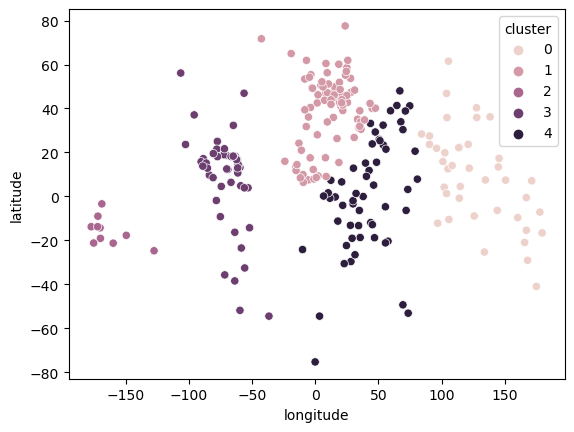

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="longitude", y="latitude", hue="cluster", data=df_cordinates)
plt.show()

In [33]:
# Elbow method

In [40]:
from sklearn.metrics import silhouette_score

inertia_values = []
for n in range(2,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_cordinates)
    # Compute the silhouette score
    silhouette_avg = silhouette_score(df_cordinates[["latitude", "longitude"]], kmeans.labels_)
    print("Silhouette score:", silhouette_avg)
    error = kmeans.inertia_
    inertia_values.append(error)

Silhouette score: 0.5195314620536514
Silhouette score: 0.5323092294559625
Silhouette score: 0.5370203878899611
Silhouette score: 0.47785844807941297
Silhouette score: 0.48984021292467483
Silhouette score: 0.4639486468042312
Silhouette score: 0.4926182428219928
Silhouette score: 0.4946101007119683
Silhouette score: 0.4738690607871126


In [38]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(df_cordinates[["latitude", "longitude"]], df_cordinates["cluster"])

print("Silhouette score:", silhouette_avg)

Silhouette score: 0.47785844807941297


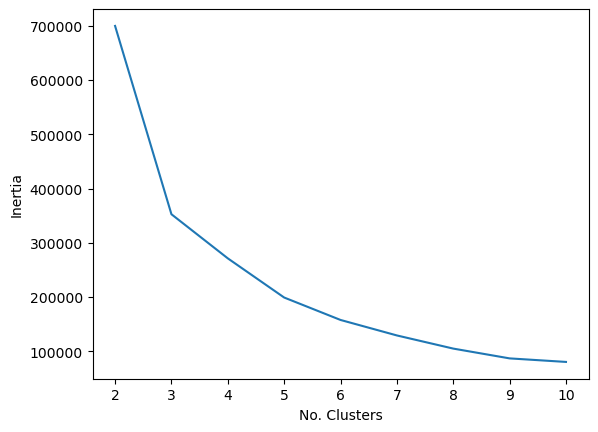

In [37]:
plt.plot(list(range(2,11)), inertia_values)
plt.xlabel("No. Clusters")
plt.ylabel("Inertia")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model with the desired number of clusters
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = agglomerative.fit_predict(df_cordinates)

In [42]:
cluster_labels

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [44]:
score = silhouette_score(df_cordinates, cluster_labels)
score

0.5211245091790162

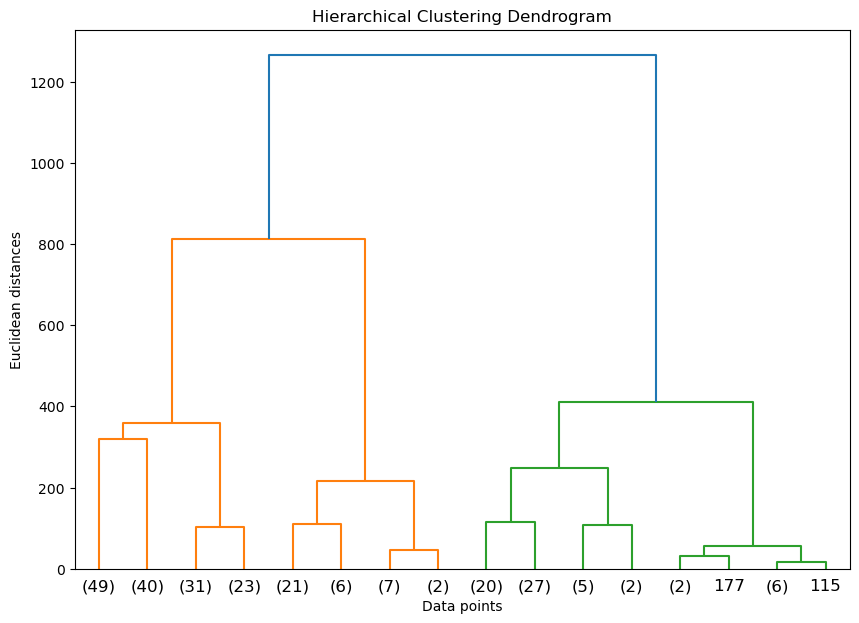

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked = linkage(df_cordinates, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df_cordinates.index, distance_sort='descending', truncate_mode='level', p=3)
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [63]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=20, min_samples=10)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = dbscan.fit_predict(df_cordinates)


In [64]:
cluster_labels

array([ 0,  0,  0,  1,  1,  0,  0,  1,  0, -1, -1, -1,  0, -1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  1,  0, -1,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0, -1,  0,  0,  1,  0,
        0, -1,  1, -1,  0,  1,  0,  0, -1,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0, -1,  0,  1, -1,
        0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0, -1,  0, -1,  0,  1,  0,  0,  0, -1, -1, -1,  0,  1,  1,
       -1, -1,  0,  0,  0,  1, -1,  1,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  1, -1,
        0,  0,  0,  0, -1

In [65]:
df_cordinates_copy = df_cordinates.copy()
df_cordinates_copy["clusters"] = cluster_labels
df_cordinates_copy

,longitude,latitude,clusters
0,1.601554,42.546245,0
1,53.847818,23.424076,0
2,67.709953,33.939110,0
3,-61.796428,17.060816,1
4,-63.068615,18.220554,1
...,...,...,...
240,48.516388,15.552727,0
241,45.166244,-12.827500,0
242,22.937506,-30.559482,0
243,27.849332,-13.133897,0


In [66]:
outliers = df_cordinates_copy.query("clusters < 0").reset_index(drop=True)
outliers

,longitude,latitude,clusters
0,-0.071389,-75.250973,-1
1,-63.616672,-38.416097,-1
2,-170.132217,-14.270972,-1
3,133.775136,-25.274398,-1
4,-63.588653,-16.290154,-1
5,3.413194,-54.423199,-1
6,-106.346771,56.130366,-1
7,-159.777671,-21.236736,-1
8,-71.542969,-35.675147,-1
9,179.414413,-16.578193,-1


30